# Back Propagation and Optimization Algorithms

# 1-1

In [1]:
#IMPORTING LIBRARIES.
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#DEFINING FUNCTIONS FOR CONTOUR PLOTTING.
def functionA(X1,X2):
    return 3*(X1**2)-2*X1*X2+3*(X2**2)-X1-X2
    
def functionB(X1,X2):
    return (X1**3)+X1*X2-(X2**2)*(X1**2)

def functionC(X1,X2):
    return (1+(X1+X2-5)**2)*(1+(3*X1-2*X2)**2)

def functionD(X1,X2):
    return 3.5*(X1**2)-9*X1*X2-8.5*(X2**2)+16*X1+8*X2

def functionE(X1,X2):
    return np.e**((X1**2)-X1+2*(X2**2)+4)

def functionF(X1,X2):
    return (((X1+X2)**4)-12*X1*X2+X1+X2+1)

In [3]:
#defining variables for plotting
x = np.linspace(-4, 4, 50)
y = np.linspace(-4, 4, 50)
X, Y = np.meshgrid(x, y)

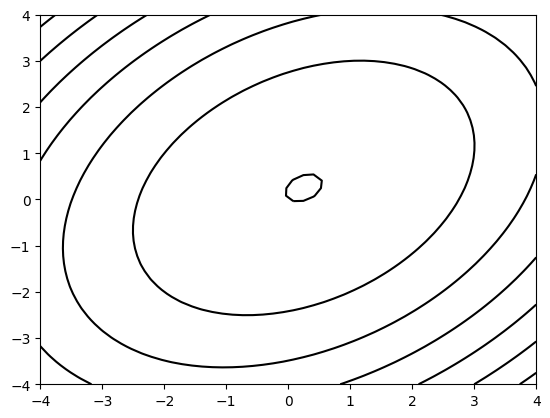

In [4]:
#plotting_functions
Z = functionA(X, Y)
plt.contour(X, Y, Z, colors='black');

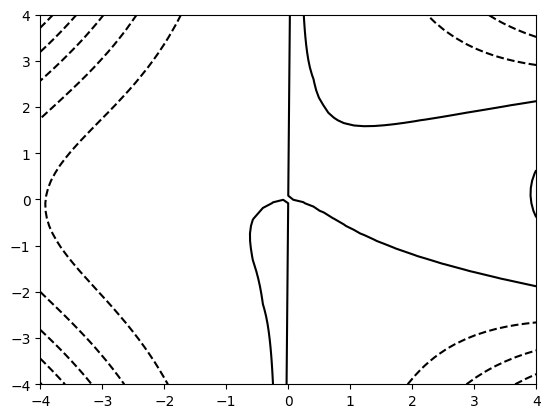

In [5]:
#plotting_functions
Z = functionB(X, Y)
plt.contour(X, Y, Z, colors='black');

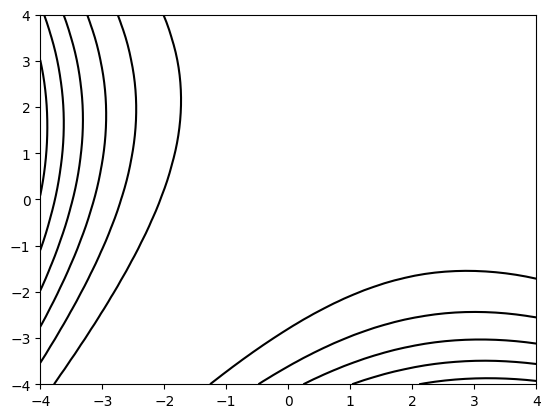

In [6]:
#plotting_functions
Z = functionC(X, Y)
plt.contour(X, Y, Z, colors='black');

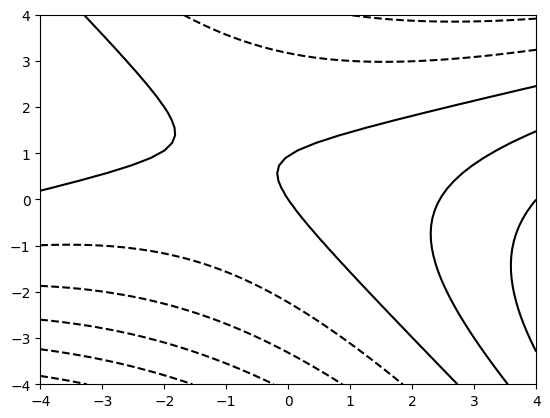

In [7]:
#plotting_functions
Z = functionD(X, Y)
plt.contour(X, Y, Z, colors='black');

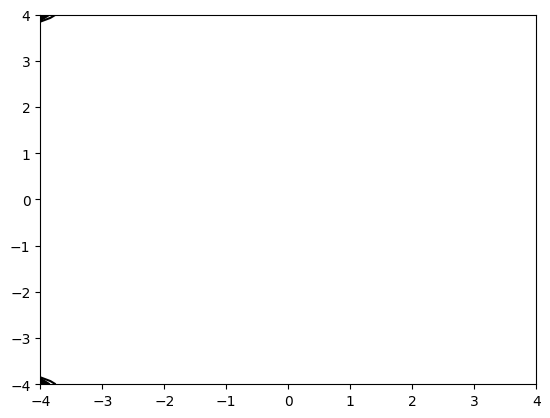

In [8]:
#plotting_functions
Z = functionE(X, Y)
plt.contour(X, Y, Z, colors='black');

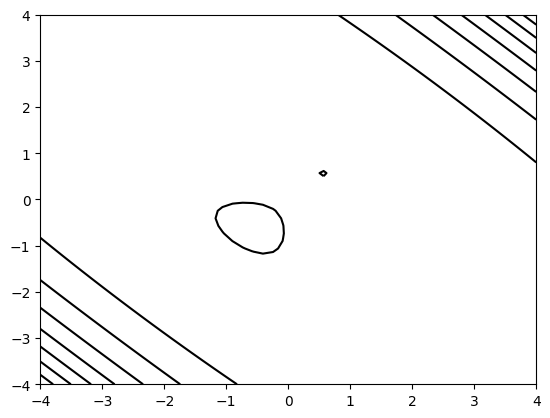

In [9]:
#plotting_functions
Z = functionF(X, Y)
plt.contour(X, Y, Z, colors='black');

In [10]:
#DEFINING FUNCTIONS FOR TAKING DERIVATIVES.
def function_A():
    return '3*(X1**2)-2*X1*X2+3*(X2**2)-X1-X2'
    
def function_B():
    return 'X1**3+X1*X2-(X2**2)*X1**2'

def function_C():
    return '(1+X1**2+2*X1*X2+X2**2-10*X1-10*X2+25)*1+9*X1**2-6*X1*X2+4*X2**2'

def function_D():
    return '3.5*(X1**2)-9*X1*X2-8.5*(X2**2)+16*X1+8*X2'

def function_E():
    return 'np.e**((X1**2)-X1+2*(X2**2)+4)'

def function_F():
    return 'X1**4+X2**4+4*X1**3*X2+4*X2**3*X1+6*X1**2*X2**2-12*X1*X2+X1+X2+1'

In [11]:
#MY IMPLEMENTED DERIVATION FUNCTION
def derivative(exp,x):
    exp = str(exp)
    exp_split = []
    str_exp_split = []
    ind = 0
    
    if exp.find(')*(') != -1:
        a = exp[:exp.find(')*(')]
        b = exp[3+exp.find(')*('):]
        return '('+a+'*'+ derivative(b,x)+')+('+b+'*'+ derivative(a,x)+')'
    
    for i in range(len(exp)):
        if exp[i] == '-' or exp[i] == '+':
            
            Q = exp[ind:i]
            if Q.find(x) != -1:
                exp_split.append(Q)
            ind = i
        
        elif exp[i] == 'n':
            if exp[i+1] == 'p' and exp[i+2] == '.' and exp[i+3] == 'e':
                if exp[i+4] == '*' and exp[i+5] == '*':
                    return '('+exp+')*('+ derivative(exp[i+6:],x)[1:]+')'
                
    
            
    if exp[ind:].find(x) != -1:
        exp_split.append(exp[ind:])
        
    new_exp_split = []
    for i in exp_split:
        if i.find('**') == -1:
            for j in range(len(i)):
                if i[j] == x[0] and i[j+1] == x[1]:
                    i = i[:j]+' 1'+i[j+2:]
                    new_exp_split.append(i)
        else:
            for j in range(len(i)):
                tem = i
                if tem[j] == x[0] and tem[j+1] == x[1]:
                    if j+2< len(tem):
                        if tem[j+2] == '*' and tem[j+3] == '*':
                            tem = tem[:j]+tem[j+4]+'*'+tem[j:j+4]+ str(int(tem[j+4])-1)+tem[j+5:]
                            new_exp_split.append(tem)
                        
    return "".join(new_exp_split)

In [12]:
#EXCHANGE FUNCTION TO CONVERT STRING VALUES TO INTEGER
def exchange(func,X1,X2):
    if func.find('X1') != -1:
        func = func.replace('X1',str(X1))
    if func.find('X2') != -1:
        func = func.replace('X2',str(X2))
    return eval(func)

In [13]:
#IMPLEMENTING Gradient_Descent CLASS:
class Gradient_Descent:
    def __init__(self,learning_rate):
        self.learning_rate = learning_rate
        
    def update(self, Func, b_input_x, b_input_y):
        for i in range(5):
            plt.scatter(b_input_x, b_input_y, marker='o', color='red')
            b_input_x = b_input_x - self.learning_rate*exchange(derivative(Func, 'X1' ) ,b_input_x,b_input_y)
            b_input_y = b_input_y - self.learning_rate*exchange(derivative(Func, 'X2' ) ,b_input_x,b_input_y)

grad_descent = Gradient_Descent(0.01)

In [14]:
#defining variables for plotting
x = np.linspace(-0.005, 0.25, 50)
y = np.linspace(-0.005, 0.25, 50)
X, Y = np.meshgrid(x, y)

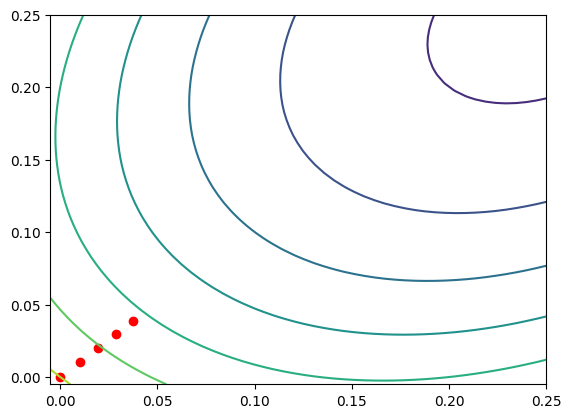

In [15]:
#showing trajectory in plotting Gradient_Descent
Z = functionA(X, Y)
plt.contour(X, Y, Z);
grad_descent.update( function_A(),0,0)
plt.show()

In [16]:
#defining variables for plotting
x = np.linspace(2, 4, 50)
y = np.linspace(2, 4, 50)
X, Y = np.meshgrid(x, y)

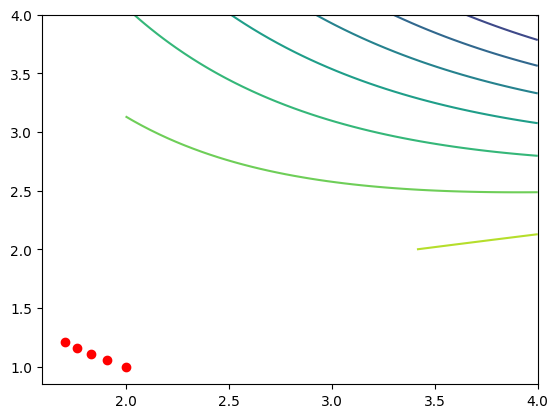

In [17]:
#showing trajectory in plotting Gradient_Descent
Z = functionB(X, Y)
plt.contour(X, Y, Z);
grad_descent.update( function_B(),2,1)
plt.show()

In [18]:
#defining variables for plotting
x = np.linspace(6, 12, 50)
y = np.linspace(6, 12, 50)
X, Y = np.meshgrid(x, y)

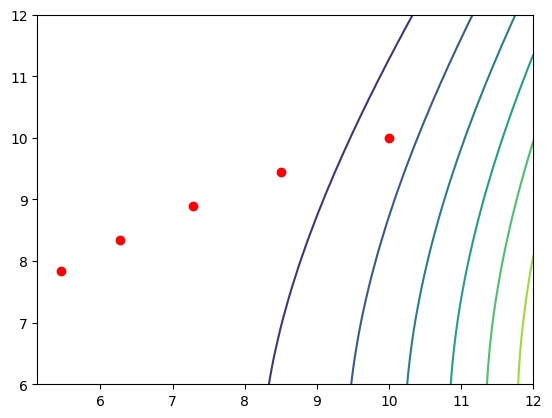

In [19]:
#showing trajectory in plotting Gradient_Descent
Z = functionC(X, Y)
plt.contour(X, Y, Z);
grad_descent.update( function_C(),10,10)
plt.show()

In [20]:
#defining variables for plotting
x = np.linspace(-4, 4, 50)
y = np.linspace(-4, 4, 50)
X, Y = np.meshgrid(x, y)

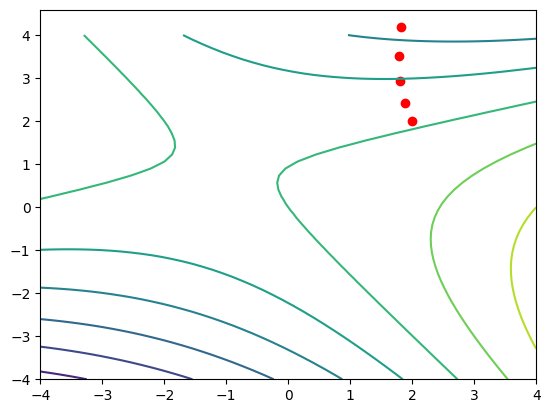

In [21]:
#showing trajectory in plotting Gradient_Descent
Z = functionD(X, Y)
plt.contour(X, Y, Z);
grad_descent.update( function_D(),2,2)
plt.show()

In [22]:
#defining variables for plotting
x = np.linspace(-1, -3, 50)
y = np.linspace(-1, -3, 50)
X, Y = np.meshgrid(x, y)

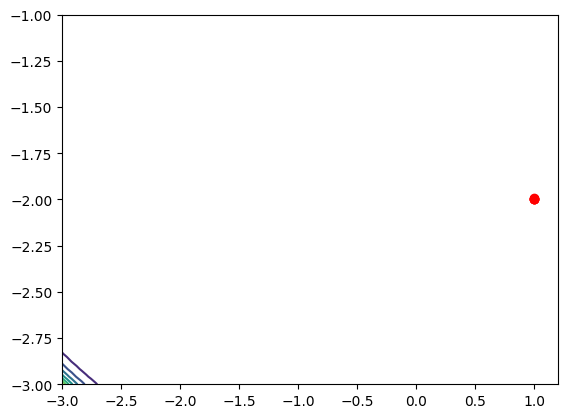

In [23]:
#showing trajectory in plotting Gradient_Descent
Z = functionE(X, Y)
plt.contour(X, Y, Z);
grad_descent.update( function_E(),1,-2)
plt.show()

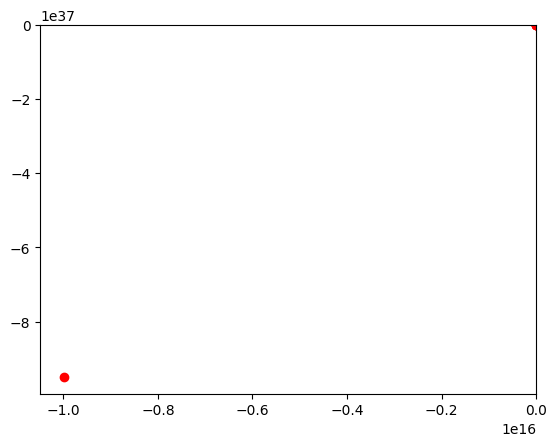

In [24]:
#showing trajectory in plotting Gradient_Descent
Z = functionF(X, Y)
plt.contour(X, Y, Z);
grad_descent.update( function_F(),-1,-2)
plt.show()

# 1_2

In [25]:
#defining dense for creating layers

class Dense:
    def __init__(self,n_inputs,n_neurons):
        self.w=np.random.uniform(-2, 2, size = (n_inputs,n_neurons))
        self.b=np.random.uniform(-2, 2, size = (1,n_neurons))
        self.weight_history = 0
        self.bias_history = 0
    
    def forward(self,inputs):
        self.input = inputs  #p
        self.output = np.dot(inputs,self.w)+self.b
    
    def backward(self,b_input):
        self.b_output = np.dot(b_input,self.w.T)
        self.g_w = np.dot(self.input.T,b_input)
        self.g_b = np.sum(b_input,axis=0,keepdims=True)

In [26]:
class Sigmoid:
    def __init__(self):
        pass
    def forward(self,inputs):
        self.input = inputs
        self.output = 1/(1+np.exp(-inputs))
    def backward(self,b_input):
        self.b_output = b_input*self.output*(1-self.output)

In [27]:
class Tanh:
    def __init__(self):
        pass    
    def forward(self,inputs):
        self.output = np.tanh(inputs)        
    def backward(self,b_input):
        self.b_output = 1-np.tanh(b_input)**2

In [28]:
class Binary_Cross_Entropy_loss:
    def __init__(self):
        pass
    
    def forward(self,y_true,y_predict):
        y_predict = np.clip(y_predict,0.000001,0.999999)
        self.output = np.mean(-(y_true*np.log(y_predict)+
                        (1-y_true)*np.log(1-y_predict)))
        
    def backward(self,b_y_true,b_y_predict):
        b_y_predict = np.clip(b_y_predict,0.000001,0.999999)
        self.b_output = np.mean(-1*((b_y_true/b_y_predict+(1-b_y_true)*(1/(1-b_y_predict)))))

In [29]:
class SGD:
    def __init__(self,learning_rate = 0.001,momentum=0):
        self.learning_rate = learning_rate
        self.momentum = momentum
    def update(self,layer):
        if self.momentum:
            weight_update = self.momentum*layer.weight_history\
            + (1-self.momentum)*(-self.learning_rate*layer.g_w)
            layer.weight_update = weight_update
            bias_update = self.momentum*layer.weight_history\
            + (1-self.momentum)*(-self.learning_rate*layer.g_b)
            layer.bias_update = bias_update
        else:
            weight_update = - self.learning_rate*layer.g_w
            bias_update = - self.learning_rate*layer.g_b
        layer.w = layer.w + weight_update
        layer.b = layer.b + bias_update

In [30]:
#Creating Training_Set
x_train = np.array([[-5,5],[-5,4],[-4,-2],[-3,4],[4,1],[3,-2],[2,-5], [0,4],[3,0],[3,-5]])
y_train = np.array([0,1,1,0,1,1,0,0,0,1])

In [31]:
# Converting labels to one hot
y_1hot = np.zeros((len(x_train),np.max(y_train)+1))

for i in range(len(y_train)):
    y_1hot[i,y_train[i]] = 1

In [32]:
#Creating the neural network
Layer1=Dense(2,3)
Act1 = Tanh()

Layer2=Dense(3,1)
Act2 = Sigmoid()

Loss = Binary_Cross_Entropy_loss()
Optimizer = SGD(learning_rate=0.001, momentum=0.9)

In [33]:
print("Layer1 weights before update:")
print(Layer1.w)

print("\nLayer1 biases before update:")
print(Layer1.b)

print("\nLayer2 weights before update:")
print(Layer2.w)

print("\nLayer2 biases before update:")
print(Layer2.b)

#forwad_propagation
Layer1.forward(x_train)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output)
Act2.forward(Layer2.output)
Loss.forward(Act2.output,y_1hot)

#back_propagation
Loss.backward(Act2.output,y_1hot)
Act2.backward(Loss.b_output)
Layer2.backward(Act2.b_output)
Act1.backward(Layer2.b_output)
Layer1.backward(Act1.b_output)

#update_params
Optimizer.update(Layer1)
Optimizer.update(Layer2)

print("\nLayer1 weights after update:")
print(Layer1.w)

print("\nLayer1 biases after update:")
print(Layer1.b)

print("\nLayer2 weights after update:")
print(Layer2.w)

print("\nLayer2 biases after update:")
print(Layer2.b)

Layer1 weights before update:
[[ 1.3214103  -0.05346981 -0.66255654]
 [ 0.47009602  1.62960707  1.27466205]]

Layer1 biases before update:
[[ 0.01486875 -0.43278546 -1.55787621]]

Layer2 weights before update:
[[ 1.47539998]
 [ 0.22589425]
 [-0.63257429]]

Layer2 biases before update:
[[0.95258504]]

Layer1 weights after update:
[[ 1.3214103  -0.05346981 -0.66255654]
 [ 0.47009602  1.62960707  1.27466205]]

Layer1 biases after update:
[[ 0.01486875 -0.43278546 -1.55787621]]

Layer2 weights after update:
[[-24.72168324]
 [ 12.41969356]
 [  8.48069392]]

Layer2 biases after update:
[[65.25330164]]


# 1_3

In [34]:
class Linear:
    def forward(self,inputs):
        self.input = inputs
        self.output = inputs
    def backward(self,b_input):
        self.b_output = b_input  

In [35]:
import numpy as np

#defining variables
x_train = []
y_train = []

sensivity1 = 0
sensivity2 = 0

#defining g(p)
def g(p):
    return 1+np.sin(p*np.pi/4)

#Creating training_set
p=-2
for i in range(21):
    t = g(p)
    y_train.append(p)
    x_train.append(t)
    p = p+(1/5)
    
#Creating_neural_network
Layer1 = Dense(1,2)
Act1 = Sigmoid()
Layer2 = Dense(2,1)
Act2 = Linear()

for i in range(21):
    
    #get access to training set members
    p = y_train[i]
    t = x_train[i]
    p = np.asarray(p)
    error_not_minimised_well = True       
    
    for j in range(50):
        if error_not_minimised_well: #if the error rate reach a good point then stop!!!
            
            #neural network forward propagation
            Layer1.forward(p)
            Act1.forward(Layer1.output)
            Layer2.forward(Act1.output)
            Act2.forward(Layer2.output)
    
            #calculating error
            error = t - Act2.output
            if error[0][0] < 0.0001 and -0.0001<error[0][0]  : #if the error rate reach a good point then stop!!!
                error_is_not_minimised_effectively = False
        
            #neural network back_propagation
            Act2.backward(Act2.output)
            Layer2.backward(Act2.b_output)
            Act1.backward(Layer2.b_output)
            Layer1.backward(Act1.b_output)
            
            #calculate sensivity which is equal to derivation of activation function
            sensivity = -2*error*Act2.b_output
            sensivity1 =  Act1.b_output* sensivity2*Layer2.w
            
            #updating parameters
            def update_param(alpha):
                Layer2.w = Layer2.w-alpha*sensivity2*Act1.output.T
                Layer2.b = Layer2.b-alpha*sensivity2
    
                Layer1.w = Layer1.w-alpha*sensivity1*p.T
                Layer1.b = Layer1.b-alpha*sensivity1
                return Layer1.w, Layer1.b, Layer2.w, Layer2.b
            update_param(0.01)
    

# 1-4 a

In [36]:
#Describing the optimization procedure using chain rule:
#When we want to have derivation of error Function F(y(0)) to use in Gradient Descent we should 
#calculate (dF(y(0)))/d(y(0)) because F(y(0)) is our error function.
#(dF(y(0)))/d(y(0)) = d(5*((t-(y(k)))^3))/d(y(0)) ==>
#is equal to: 15*((t - y(k))^2)* -(d(y(k)))/(d(y(0))) , (d(y(k)))/(d(y(0))) =r(k) ==>
#r(k+1) =  r(k)*(d(y(k+1)))/(d(y(k)))  , and we know (d(y(k+1)))/(d(y(k)))= f_dot(y(k)) ==>
#r(k+1) = r(k)*f_dot(y(k)), r(0) = 1 from these facts we can prove that: ==>
#(dF(y(0)))/d(y(0)) = 15*((t-y(k))**2)*[-r(k)]

# 1-4 b & 1-4 c  

In [37]:

#defining function f
def f(x):
    return (-1/(2*x))+3

#defining function derivation f
def d_f(x):
    return 1/(2*(x**2))

#defining function y
def y(k):
    if k==0:
        return 1
    else:
        return 2*f(3*y(k-1))

#defining function derivation y
def d_y(k): 
    if k==0:
        return 1
    else:
        return 6*d_y(k-1)*d_f(3*y(k-1))

#defining function F
def F1(t,k):
    return 5* ((t-y(k))**3)

#defining function derivation F
def derivation_F1(t,k):
    return 15* ((t-y(k))**2)*(-d_y(k))

#defining gradient_descent as function to solve this problem and minimize the error
def grad_desc(t,k,F1, learning_rate):
    for i in range(10):
        F1 = F1 - derivation_F1(t,k)*learning_rate
    return F1

grad_desc(2,4,F1(2,4),0.01)

-306.72861930616864

# 1-5 a

In [38]:
class Mean_Square_Error_loss:
    def __init__(self):
        pass
    def forward(self,y_predict,y_true):
        self.output = np.mean((y_true-y_predict)**2,axis = 0)
    
    def backward(self,y_predict,y_true):
        self.b_output = -2*(y_true-y_predict)/len(y_predict)
        

In [39]:
class ReLU:
    def __init__(self):
        pass
    
    def forward(self,inputs):
        self.output = np.maximum(0,inputs)
        self.input = inputs
    
    def backward(self,b_input):
        self.b_output = b_input  
        self.b_output[self.input<=0] = 0

In [40]:
#creating neural network model -- The first picture

Layer1 = Dense(2,3)
Layer2 = Dense(3,1)
Act1 = ReLU()
Act2 = Linear()
Loss = Mean_Square_Error_loss()

In [41]:
x_train = np.array([[-1,1],[2,-3],[0,2],[-1,-4]])
y_train = np.array([[2.2],[5.7],[-2.9],[1.8]])
w_bypass = [2]

# s = w_bypass * x_train[i][0]
s = [[-2],[4],[0],[-2]]

In [42]:
#forward
Layer1.forward(x_train)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output+s) #adding w_bypass * p1
Act2.forward(Layer2.output)
Loss.forward(Act2.output,y_train)



In [43]:
#backward
Loss.backward(Act2.output,y_train)
Act2.backward(Loss.b_output)
Layer2.backward(Act2.b_output)
Act1.backward((Layer2.b_output))
Layer1.backward(Act1.b_output)

#update params
Optimizer.update(Layer1)
Optimizer.update(Layer2)

In [44]:
print("Layer1.w =\n", Layer1.w)
print("Layer2.w =\n", Layer2.w)
print("Layer1.b =\n", Layer1.b)
print("Layer2.b =\n", Layer2.b)

Layer1.w =
 [[ 0.98337979 -0.01107251  0.06304713]
 [ 0.35322961  1.34338204  1.01858262]]
Layer2.w =
 [[-1.97273424]
 [ 0.72174332]
 [-0.17642957]]
Layer1.b =
 [[ 1.35601753  0.58268131 -1.87023087]]
Layer2.b =
 [[-1.4707744]]


# 1-5 b

there is no possibility for this w_bypass to affect our neural network.

In [45]:
#forward
Layer1.forward(x_train)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output)
Act2.forward(Layer2.output)
Loss.forward(Act2.output,y_train)


In [46]:
#backward
Loss.backward(Act2.output,y_train)
Act2.backward(Loss.b_output)
Layer2.backward(Act2.b_output)
Act1.backward((Layer2.b_output))
Layer1.backward(Act1.b_output)

#update params
Optimizer.update(Layer1)
Optimizer.update(Layer2)

In [47]:
print("Layer1.w =\n", Layer1.w)
print("Layer2.w =\n", Layer2.w)
print("Layer1.b =\n", Layer1.b)
print("Layer2.b =\n", Layer2.b)

Layer1.w =
 [[ 0.98144988 -0.0112062   0.06304713]
 [ 0.35624618  1.34353805  1.01857716]]
Layer2.w =
 [[-1.97125132]
 [ 0.72215269]
 [-0.17642699]]
Layer1.b =
 [[ 1.35447395  0.58282616 -1.87023359]]
Layer2.b =
 [[-1.46982841]]
